<a href="https://colab.research.google.com/github/KamsenaM/Snippets/blob/main/Task4aCode_%5B082384%5D_%5BKamsena%5D_M%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####################################################################
#####################################################################
 //                              WELCOME!                         // 
// Its always a pleasure before we procced please do the following //
// Please enter your username and password to verify your account  //
//                               THANK YOU                         //
#####################################################################
#####################################################################
please enter your usernameqwerty
please enter your password12345
access granted
Please enter start date for your time range (DD/MM/YYYY) 1/1/21
Please enter end date for your time range (DD/MM/YYYY) 31/12/21
###############################################
Welcome! Please choose an option from the list
1. Show profit/loss for specific products
2. Show profit/loss for all products
3. Show quantity of products sold from different suppliers

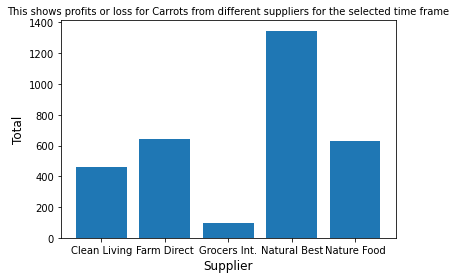

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import time

def login(): 
  print("#####################################################################")
  print("#####################################################################")
  print(" //                              WELCOME!                         // ")
  print("// Its always a pleasure before we procced please do the following //")
  print("// Please enter your username and password to verify your account  //")
  print("//                               THANK YOU                         //")
  print("#####################################################################")
  print("#####################################################################")
    
  count=0
  while count <3:
    user = input("please enter your username")
    pin = input("please enter your password")
    if user == "qwerty" and pin == "12345":
      print("access granted")
      break
    else:
      print("access denied")
      count +=1

def profit_loss_menu():
    flag = True
    while flag:
        print("###############################################")
        print("Welcome! Please choose an option from the list")
        print("1. Show profit/loss for specific products")
        print("2. Show profit/loss for all products")
        print("3. Show quantity of products sold from different suppliers")
        print("4. Show profits on products from different suppliers")
        print("###############################################")

        profit_loss_choice = input("Please enter the number of your choice (1-4): ") 

	      # This code tries to convert the input into an int
	      # if it fails, the except: path is executed, otherwise the else path
        try:  
            int(profit_loss_choice)
        except:
            print("Sorry, you did not enter a valid choice")
            flag = True
        else:
            if int(profit_loss_choice) < 1 or int(profit_loss_choice) > 4: # I had changed the options to 4 instead of 2 - Crystal
                print("Sorry, you did not enter a valid choice")
                flag = True
            else:
                return int(profit_loss_choice) 

def get_product_choice():
    flag = True
    while flag:
        print("######################################################")
        print("Please choose a product from the list:")
        print("Please enter the number of the product (1-16)")
        print("1.  Potatoes")
        print("2.  Carrots")
        print("3.  Peas")
        print("4.  Lettuce")
        print("5.  Onions")
        print("6.  Apples")
        print("7.  Oranges")
        print("8.  Pears")
        print("9.  Lemons")
        print("10. Limes")
        print("11. Melons")
        print("12. Cabbages")
        print("13. Asparagus")
        print("14. Broccoli")
        print("15. Cauliflower")
        print("16. Celery")
        print("######################################################")

        product_list = ["Potatoes", "Carrots", "Peas", "Lettuce", "Onions", 
"Apples", "Oranges", "Pears", "Lemons", "Limes","Melons", "Cabbages", 
"Asparagus", "Broccoli", "Cauliflower", "Celery"]

        product_choice = input("Please enter the number of your choice (1-16): ")
	      # This checks the input is an integer
        try:
            int(product_choice)
        except:
            print("Sorry, you did not enter a valid choice")
            flag = True
        else:
            if int(product_choice) < 1 or int(product_choice) > 16:
                print("Sorry, you did not enter a valid choice")
                flag = True
            else:
                product_name = product_list[int(product_choice)-1]
                return product_name


def get_start_date():
    flag = True
    while flag:
        start_date = input('Please enter start date for your time range (DD/MM/YYYY) ')
        # This checks the start date is a valid date
        try:
           pd.to_datetime(start_date)
        except:
            print("Sorry, you did not enter a valid date")
            flag = True
        else:
            start_date_return = pd.to_datetime(start_date, dayfirst=True)
            if (pd.isnull(start_date_return) == True):
                print("Sorry, you did not enter a valid date")
                flag = True
            else:
                return start_date_return

def get_end_date():
    flag = True
    while flag:
        end_date = input('Please enter end date for your time range (DD/MM/YYYY) ')
        # This checks the end date is a valid date
        try:
           pd.to_datetime(end_date)
        except:
            print("Sorry, you did not enter a valid date")
            flag = True
        else:
            end_date_return = pd.to_datetime(end_date, dayfirst=True)
            if (pd.isnull(end_date_return) == True):
                print("Sorry, you did not enter a valid date")
                flag = True
            else:
                return end_date_return

def get_date_range_all():
    # df1 is a pandas data frame being created from a csv file
    df1 = pd.read_csv("Task4a_data.csv") 

    df1["Date"] = pd.to_datetime(df1["Date"], dayfirst=True) # convert Date column to be a datetime object

    # This selects all the rows between the dates and removes the Supplier column completely
    # results is another data frame
    results = df1.loc[(df1["Date"] >= start_date) & (df1["Date"] <= end_date), df1.columns != "Supplier"].copy()
    
    # Calculate some new columns from existing columns
    results["Cost Subtotal"] = results["KGs Purchased"] * results["Purchase Price"]
    results["Sales subtotal"] = results["KGs Sold"] * results["Selling Price"]
    results["Profit subtotal"] = results["Sales subtotal"] - results["Cost Subtotal"]
    
    total = round(results["Profit subtotal"].sum(),2)
    
    sales = results.groupby(['Product'])['Profit subtotal'].sum().reset_index() #I had added this line of code, so that it would group the sum profit and loss for each product - Crystal


    
    # The to_string function just makes the Pandas data frame look nice
    # without the index (index = False)
    results_print = results.to_string(index=False)
    print(results_print)

    # The format function is just a convenient way to make a string to print out
    # Anything between the {} is replaced with the value of the variables that are passed to the string
    print("The overall profit/loss for the selected time frame was Â£{}".format(total))
    

    plt.xlabel('Product', fontsize=12) #This was added to label the x-axis to 'Product' and change the font size to '12'- Crystal
    plt.ylabel('Total', fontsize=12)  #This was added to label the y-axis to 'Total' - Crystal
    plt.title('This shows profits or loss for all product  for the selected time frame', fontsize = 10) #This gives the graph a title explaining what it is presenting to the end user - Crystal
    plt.bar(sales['Product'],sales['Profit subtotal']) #This plots a bar chart to show the product and the profit/loss - Crystal
    plt.show() #This shows the graph to the end user - Crystal



def get_date_range_product():
    product_name = get_product_choice()
    # df2 is a pandas data frame from the complete csv file
    df2 = pd.read_csv("Task4a_data.csv") 

    df2["Date"] = pd.to_datetime(df2["Date"], dayfirst=True) # convert Date column to be a datetime object

    # This selects all the rows in the data frame between the dates and for the chosen product 
    # and makes a new data frame called product_results
    product_results = df2.loc[(df2["Date"] >= start_date) & (df2["Date"] <= end_date) & (df2["Product"] == product_name)].copy()

    # Calculate some new columns from existing columns
    product_results["Cost Subtotal"] = product_results["KGs Purchased"] * product_results["Purchase Price"]
    product_results["Sales subtotal"] = product_results["KGs Sold"] * product_results["Selling Price"]
    product_results["Profit subtotal"] = product_results["Sales subtotal"] - product_results["Cost Subtotal"]
    
    total = round(product_results["Profit subtotal"].sum(),2)
    # The to_string function just makes the Pandas data frame look nice
    results_print = product_results.to_string(index=False)
    
    product_results['Date'] = pd.to_datetime(product_results['Date']) 
    product_results.sort_values(by=['Date'],inplace = True) 
    
    print(results_print)
    # The format function is just a convenient way to make a string to print out 
    # Anything between the {} is replaced with the value of the variables that are passed to the string
    print("The profit/loss for the {} for the selected time frame was Â£{}".format(product_name, total))
    
    plt.xticks(rotation=90) 
    plt.xlabel('Date', fontsize=12) #This gives the x-axis the label of "Date" - Mina
    plt.ylabel('Profit Subtotal', fontsize=12) #This gives the y-axis the label of "Profit Subtotal" -Mina
    plt.title('This shows the the profit/loss for {} for the selected time frame, which was Â£{}'.format(product_name, total), fontsize = 10) # This gives the graph a title and set the font size to '10' -Mina
    plt.plot(product_results['Date'], product_results['Profit subtotal']) #This was used to plot the information onto the graph which is the date and the profit/loss for that specific product-Mina
    plt.show() #This shows the graph to the end user -Mina


def get_date_range_sold_product_supplier():
    product_name = get_product_choice()
    # df23 is a pandas data frame from the complete csv file
    df3 = pd.read_csv("Task4a_data.csv") 

    df3["Date"] = pd.to_datetime(df3["Date"], dayfirst=True) # convert Date column to be a datetime object

    # This selects all the rows in the data frame between the dates and for the chosen product 
    # and makes a new data frame called product_results
    product_results = df3.loc[(df3["Date"] >= start_date) & (df3["Date"] <= end_date) & (df3["Product"] == product_name)].copy()

    # Calculate some new columns from existing columns
    sales = product_results.groupby(['Supplier'])['KGs Sold'].sum().reset_index() #This calculates the total sum of KGs Sold of the product per supplier during the specific time frame -Mina
    
    results_print = product_results.to_string(index=False)
    print(results_print)
  
    plt.xlabel('Supplier', fontsize=12) #This labels the x-axis to 'Supplier' while changing the font size to '12' - Mina
    plt.ylabel('KGs Sold', fontsize=12) #This labels the y-axis to 'KGs Sold' and changes the font size to '12' - Mina
    plt.title('This shows quantity of {} sold from different suppliers during the selected time frame'.format(product_name), fontsize = 10)# This gives the graph a title and set the font size to '10' - Crystal
    plt.bar(sales['Supplier'],sales['KGs Sold'])#This was used to plot the information onto the graph  which is the Supplier and the KGs Sold  for that specific product- Crystal
    plt.show() #This shows the graph to the end user -Mina without this function the outcme we look forward to won't show up

def get_date_range_profit_product_supplier():
    product_name = get_product_choice()
    # df23 is a pandas data frame from the complete csv file
    df4 = pd.read_csv("Task4a_data.csv") 

    df4["Date"] = pd.to_datetime(df4["Date"], dayfirst=True) # convert Date column to be a datetime object

    # This selects all the rows in the data frame between the dates and for the chosen product 
    # and makes a new data frame called product_results
    product_results = df4.loc[(df4["Date"] >= start_date) & (df4["Date"] <= end_date) & (df4["Product"] == product_name)].copy()
    
    product_results["Cost Subtotal"] = product_results["KGs Purchased"] * product_results["Purchase Price"]
    product_results["Sales subtotal"] = product_results["KGs Sold"] * product_results["Selling Price"]
    product_results["Profit subtotal"] = product_results["Sales subtotal"] - product_results["Cost Subtotal"]
    
    total = round(product_results["Profit subtotal"].sum(),2)

    sales = product_results.groupby(['Supplier'])['Profit subtotal'].sum().reset_index()#This calculates the total sum of profit/loss of the product per supplier during the specific time frame - Crystal
    

    results_print = product_results.to_string(index=False)
    print(results_print)

    plt.xlabel('Supplier', fontsize=12)#This labels the x-axis to 'Supplier' and changes the font size to '12' - Crystal
    plt.ylabel('Total', fontsize=12)#This labels the y-axis to 'Total' and changes the font size to '12' - Crystal
    plt.title('This shows profits or loss for {} from different suppliers for the selected time frame'.format(product_name), fontsize = 10) # This gives the graph a title and set the font size to '10' - Crystal
    plt.bar(sales['Supplier'],sales['Profit subtotal'])#This was used to plot the information onto the graph  which is the Supplier and the Profit Subtotal  for that specific product- Crystal
    plt.show()#This shows the graph to the end user - Crystal



def process_menu_choice():
    if profit_choice == 1:
        get_date_range_product()
    elif profit_choice == 2:
        get_date_range_all()
    elif profit_choice == 3: #added third and fourth option, so that they can access the last two procendures - Mina
        get_date_range_sold_product_supplier()
    else:
        get_date_range_profit_product_supplier()
 


        

login = login()
start_date = get_start_date()
end_date = get_end_date()
profit_choice = profit_loss_menu()
pres = process_menu_choice()
